# Image Preprocessing and Augmentation


## Data pre-processing and data augmentation

___In order to make the most of our few training examples, we will "augment" our data via a number of random transformations, so that our model would never see twice the exact same picture. This helps prevent overfitting and helps the model generalize better.___

In [1]:
import tensorflow as tf
import glob
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

tf_keras = tf.contrib.keras

# Image Data Generator

TF-Keras provides a class called `tf_keras.preprocessing.image.ImageDataGenerator`.

This class __generates minibatches of image data with real-time data augmentation__

- Arguments:
    - __featurewise_center__: Boolean, set input mean to 0 over the dataset.
    - samplewise_center: set each sample mean to 0.
    - __featurewise_std_normalization__: Boolean, divide inputs by std of the
    dataset.
    - samplewise_std_normalization: divide each input by its std.
    - __zca_whitening__: apply ZCA whitening.
    - __rotation_range__: degrees (0 to 180).
    - __width_shift_range__: fraction of total width.
    - __height_shift_range__: fraction of total height.
    - __shear_range__: shear intensity (shear angle in radians).
    - __zoom_range__: amount of zoom. if scalar z, zoom will be randomly
        picked in the range [1-z, 1+z].
    - __channel_shift_range__: shift range for each channels.
    - __fill_mode__: __points outside the boundaries__ are filled
        according to the given mode __('constant', 'nearest',
        'reflect' or 'wrap')__.
    - cval: value used for points outside the boundaries when
        fill_mode is 'constant'. Default is 0.
    - __horizontal_flip__: Boolean, whether to randomly flip images horizontally.
    - __vertical_flip__: Boolean, whether to randomly flip images vertically.
    - __rescale__: rescaling factor (_usually normalization factor_). If None or 0, no rescaling is
        applied, otherwise we multiply the data by the value
        provided (before applying any other transformation).
    - __preprocessing_function__: function that will be implied on each
        input. The function will run before any other modification
        on it.


# Normalize and Augment Images

In [9]:
num_classes=10


# load dataset
(x_train, y_train), (x_test, y_test) = tf_keras.datasets.cifar10.load_data()

# Turn target values into one-hot encoded vectors
y_train =tf_keras.utils.to_categorical(y_train, num_classes)
y_test = tf_keras.utils.to_categorical(y_test, num_classes)

# Normalize and augment images
datagen = tf_keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

datagen.fit(x_train)
    
datagen.flow(x = x_train, y = y_train, batch_size=32)

# if use other datasets
# datagen.flow_from_directory(directory_path, target_size=(256, 256), class_mode='categorical', batch_size=32)

# Data Augmentation Example

In [10]:
# define augmentation transformations (no normalization)
datagen = tf_keras.preprocessing.image.ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

# Generate Same Image

<img src="images/lovehubert.png" width="400">

In [24]:
# load to PIL image
img = tf_keras.preprocessing.image.load_img('images/lovehubert.png')

# transform to Numpy array with shape (3, height, width)
x = tf_keras.preprocessing.image.img_to_array(img) 

# reshape to 4D tesnor with shape (1, 3, height, width)
# or np.expand_dims(x, axis=0)
x = x.reshape((1,) + x.shape)

i = 0
for batch in datagen.flow(x, batch_size=1,
                          save_to_dir='images',
                          save_prefix='lovehubert', save_format='png'):
    i += 1
    if i > 16:
        break      

# Visualize Generated Images

In [26]:
generated_images = glob.glob('images/lovehubert*.png')
print("{} images generated".format(len(generated_images)))

17 images generated


In [27]:
def plot_image_grid(generated_images):
    # figure size
    fig = plt.figure(figsize=(8, 8))
    
    # load images
    images = [tf_keras.preprocessing.image.load_img(img) for img in generated_images]
    
    # plot image grid
    for x in range(4):
        for y in range(4):
            ax = fig.add_subplot(4, 4, 4*x+y+1)
            plt.imshow(images[4*y+x])
            plt.xticks(np.array([]))
            plt.yticks(np.array([]))
    plt.show()

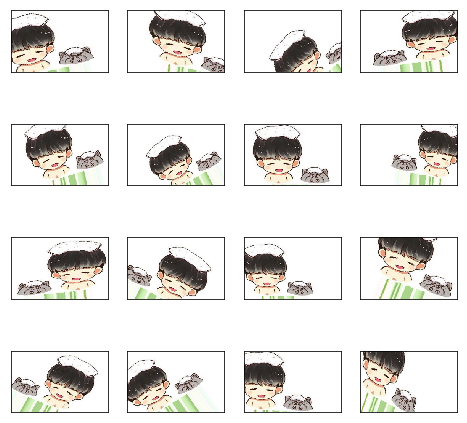

In [28]:
plot_image_grid(generated_images)

# Data Generator for Training and Testing

In [ ]:

train_datagen = tf_keras.preprocessing.image.ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = tf_keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

# Read images fro folder 'data/train', and indefinitely generate
# batches of augmented image data 
train_generator = train_datagen.flow_from_directory(
        'data/train',
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical')

# Generate images for validation data
validation_generator = test_datagen.flow_from_directory(
        'data/validation',
        target_size=(150, 150),
        batch_size=32,
        class_mode='categorical')

# Train a Model with a Data Generator

In [ ]:
# your neural network model
model = tf_keras.models.Model(inputs=inputs, outputs=outputs)

# SGD/optimizer
optimizer = tf_keras.optimizers.SGD(lr=learning_rate)

# compile the model with loss, optimizer and evaluation metrics
model.compile(loss = tf_keras.losses.categorical_crossentropy,
              optimizer = optimizer,
              metrics = [tf_keras.metrics.categorical_accuracy])

# fits the model on batches with real-time data augmentation
# the generator is run in parallel to the model, for efficiency.
model.fit_generator(
        train_generator,
        steps_per_epoch=200,
        epochs=5,
        validation_data=validation_generator,
        validation_steps=800)

# evaluate the model on batches with real-time data augmentation
model.evaluate_generator(validation_generator, steps = 100)

# make predictions on batches with real-time data augmentation
predictions = model.predict_generator(validation_generator, steps = 100)

model.save_weights('image_classifier_iter_1.h5')